In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Ai Quest/class-11/mall customers.csv')

In [164]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [165]:
#df.corr()

In [166]:
df.drop('CustomerID', axis='columns',inplace=True)

In [167]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


column name rename kore nite pari, code korar subidhay

In [168]:
df.rename(columns = {'Spending Score (1-100)' : 'score', 'Annual Income (k$)' : 'income'}, inplace = True)

In [169]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [170]:
dummy = pd.get_dummies(df.Gender, prefix = 'Gender', drop_first = True)

In [171]:
df = df.drop('Gender',axis=1)

In [172]:
df = pd.concat([df,dummy], axis=1)

In [173]:
df.head()

,Age,income,score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [174]:
df.to_csv('new.csv')

#Visualization

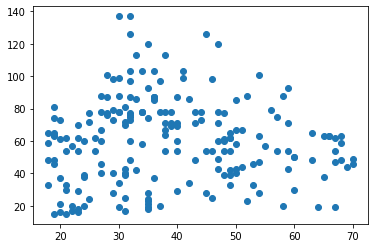

In [175]:
plt.scatter(df['Age'],df['income'])

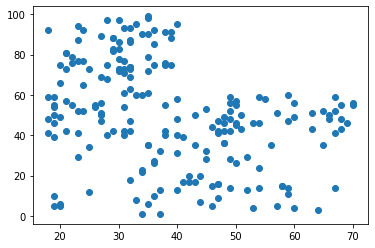

In [176]:
plt.scatter(df['Age'],df['score'])

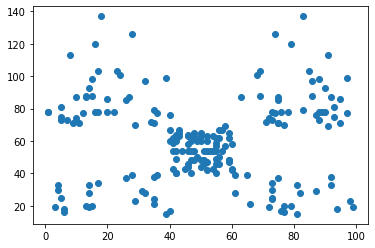

In [177]:
plt.scatter(df['score'],df['income'])

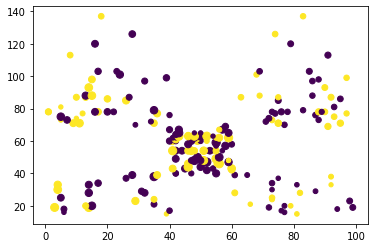

In [178]:
plt.scatter(df['score'],df['income'],df['Age'],df['Gender_Male'])

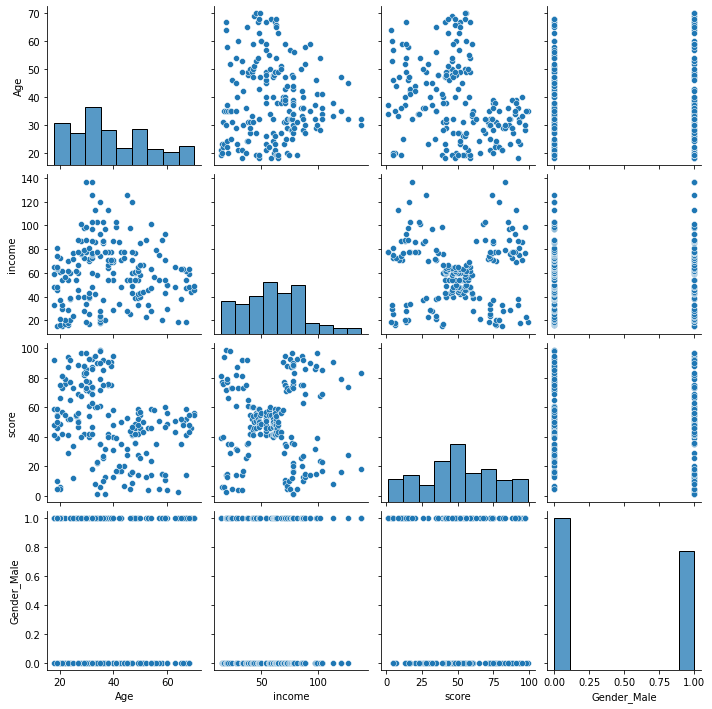

In [179]:
#pairplot
#seaborn library use korte hoy
sns.pairplot(df[['Age','income','score','Gender_Male']])

In [180]:
import sklearn.cluster as cluster

In [181]:
kmeans = cluster.KMeans() # ekhane default 8 ta cluster

In [182]:
kmeans.fit(df[['Gender_Male','Age','income','score']])

KMeans()

In [183]:
kmeans.cluster_centers_ # 8 tacluster er 8 ta centroide

array([[  0.46428571,  32.78571429,  78.03571429,  81.89285714],
       [  0.35135135,  27.10810811,  56.2972973 ,  49.67567568],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.44444444,  56.15555556,  53.37777778,  49.08888889],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.38095238,  44.14285714,  25.14285714,  19.52380952],
       [  0.65384615,  41.23076923,  79.26923077,  15.92307692],
       [  0.45454545,  32.45454545, 108.18181818,  82.72727273]])

In [184]:
#now ami prediction korte chai k kon cluster a jabe,
kmeans.predict(df[['Gender_Male','Age','income','score']])

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 1,
       5, 4, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       1, 0, 6, 0, 6, 0, 6, 0, 6, 0, 1, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7], dtype=int32)

In [185]:
df1 = df.copy()

In [186]:
 df['cluster'] = kmeans.predict(df[['Gender_Male','Age','income','score']])

In [187]:
df.head()


,Age,income,score,Gender_Male,cluster
0,19,15,39,1,5
1,21,15,81,1,4
2,20,16,6,0,5
3,23,16,77,0,4
4,31,17,40,0,5


In [188]:
#df1['cluster']  = kmeans.fit_predict(df[['income','score']])

In [189]:
#df1.head()

#VISULIZATION  based on clusters

In [190]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]
df4 = df[df.cluster == 4]
df5 = df[df.cluster == 5]
df6 = df[df.cluster == 6]
df7 = df[df.cluster == 7]


In [191]:
df.shape

(200, 5)

In [192]:
df0.shape

(28, 5)

In [193]:
df1.shape

(37, 5)

In [194]:
df2.shape

(10, 5)

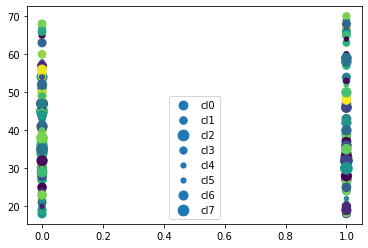

In [195]:
plt.scatter(df0['Gender_Male'], df0['Age'],df0['income'], df0['score'], label = 'cl0')
plt.scatter(df1['Gender_Male'], df1['Age'],df1['income'], df1['score'],  label = 'cl1')
plt.scatter(df2['Gender_Male'], df2['Age'],df2['income'], df2['score'],  label = 'cl2')
plt.scatter(df3['Gender_Male'], df3['Age'],df3['income'], df3['score'],  label = 'cl3')
plt.scatter(df4['Gender_Male'], df4['Age'],df4['income'], df4['score'],  label = 'cl4')
plt.scatter(df5['Gender_Male'], df5['Age'],df5['income'], df5['score'], label = 'cl5')
plt.scatter(df6['Gender_Male'], df6['Age'],df6['income'], df6['score'],  label = 'cl6')
plt.scatter(df7['Gender_Male'], df7['Age'],df7['income'], df7['score'],  label = 'cl7')
plt.legend()

In [196]:
center1 = kmeans.cluster_centers_

In [197]:
center1

array([[  0.46428571,  32.78571429,  78.03571429,  81.89285714],
       [  0.35135135,  27.10810811,  56.2972973 ,  49.67567568],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.44444444,  56.15555556,  53.37777778,  49.08888889],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.38095238,  44.14285714,  25.14285714,  19.52380952],
       [  0.65384615,  41.23076923,  79.26923077,  15.92307692],
       [  0.45454545,  32.45454545, 108.18181818,  82.72727273]])

In [198]:
#amra ekebare korbo ekhane, 
#center1 er data frame a
#[:,0] all rows 1st column 
#[:,1] all rows 2nd column

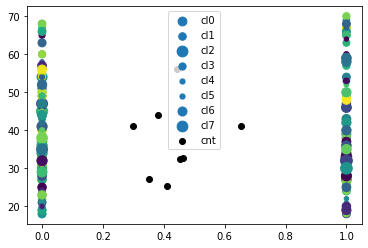

In [199]:
plt.scatter(df0['Gender_Male'], df0['Age'],df0['income'], df0['score'], label = 'cl0')
plt.scatter(df1['Gender_Male'], df1['Age'],df1['income'], df1['score'],  label = 'cl1')
plt.scatter(df2['Gender_Male'], df2['Age'],df2['income'], df2['score'],  label = 'cl2')
plt.scatter(df3['Gender_Male'], df3['Age'],df3['income'], df3['score'],  label = 'cl3')
plt.scatter(df4['Gender_Male'], df4['Age'],df4['income'], df4['score'],  label = 'cl4')
plt.scatter(df5['Gender_Male'], df5['Age'],df5['income'], df5['score'], label = 'cl5')
plt.scatter(df6['Gender_Male'], df6['Age'],df6['income'], df6['score'],  label = 'cl6')
plt.scatter(df7['Gender_Male'], df7['Age'],df7['income'], df7['score'],  label = 'cl7')
 

plt.scatter(center1[:,0], center1[:,1], color = 'black', label = 'cnt')
plt.legend()

#select optimal number of clusters

In [200]:
#elbow method
#loop chalabo
from sklearn.cluster import KMeans
wCSS = []
cluster = range(1,20)
for k in cluster:
    kmeans2 = KMeans(n_clusters=k) #default holo 8 #protibar k value ta update hobe
    #amra cluster 15 porjnto dekhbo amader error(distance) ta kmn ase,
    kmeans2.fit(df[['Gender_Male','Age','income','score']])
    wCSS.append(kmeans2.inertia_)
    #inertia mane bojhay sum of squared error
    #Inertia measures how well a dataset was clustered by K-Means. 
    #It is calculated by measuring the distance between each data point and its centroid, 
    #squaring this distance, and summing these squares across one cluster.
    #A good model is one with low inertia AND a low number of clusters ( K ).
    

In [201]:
wCSS

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75412.59682443162,
 58348.641363315044,
 51201.740785418944,
 44355.31351771351,
 40655.686213786204,
 37436.39249440214,
 35267.58108188108,
 32319.423983679146,
 30572.117958892955,
 27829.936719489662,
 26613.06725774226,
 24867.489777890958,
 23615.14617151854,
 22105.384998695827,
 20335.226543270972]

uporer data set theke bujhteci 1st 6 ta hobar por thekei distance gula kachakaci, so 1st 6 ai nibo

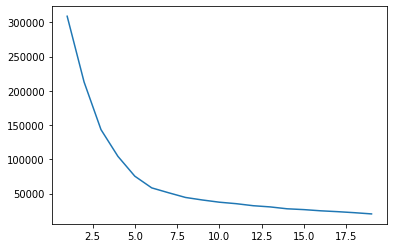

In [202]:
plt.plot(cluster, wCSS)

In [203]:
!pip install kneed #third party library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
from kneed import KneeLocator

In [205]:
kn = KneeLocator(cluster,wCSS, curve = 'convex', direction = 'decreasing')

In [206]:
kn.knee

6

In [207]:
print('Optimal number of clusters   ', kn.knee)

Optimal number of clusters    6


In [208]:
df.head()

,Age,income,score,Gender_Male,cluster
0,19,15,39,1,5
1,21,15,81,1,4
2,20,16,6,0,5
3,23,16,77,0,4
4,31,17,40,0,5


#After Tuning

In [209]:
import sklearn.cluster as cls

In [210]:
kmean3 = cls.KMeans(n_clusters = 6)

In [211]:
df['new_cluster'] = kmean3.fit_predict(df[['Gender_Male','Age','income', 'score']])

In [212]:
df = df.drop('cluster',axis=1)

In [213]:
df.head()

,Age,income,score,Gender_Male,new_cluster
0,19,15,39,1,2
1,21,15,81,1,4
2,20,16,6,0,2
3,23,16,77,0,4
4,31,17,40,0,2


In [214]:
center2 = kmean3.cluster_centers_

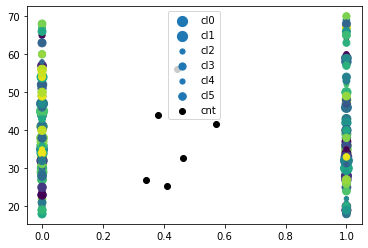

In [215]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]
df5 = df[df.new_cluster == 5]


plt.scatter(df0['Gender_Male'], df0['Age'],df0['income'], df0['score'], label = 'cl0')
plt.scatter(df1['Gender_Male'], df1['Age'],df1['income'], df1['score'],  label = 'cl1')
plt.scatter(df2['Gender_Male'], df2['Age'],df2['income'], df2['score'],  label = 'cl2')
plt.scatter(df3['Gender_Male'], df3['Age'],df3['income'], df3['score'],  label = 'cl3')
plt.scatter(df4['Gender_Male'], df4['Age'],df4['income'], df4['score'],  label = 'cl4')
plt.scatter(df5['Gender_Male'], df5['Age'],df5['income'], df5['score'], label = 'cl5')

 

plt.scatter(center2[:,0], center2[:,1], color = 'black', label = 'cnt')
plt.legend()

